# MNIST Data

According to Yann LeCun on this [site](http://yann.lecun.com/exdb/mnist/#:~:text=It%20is%20a%20good%20database,efforts%20on%20preprocessing%20and%20formatting.), the MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

<p align="center">
    <img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1"></img>
</p>

## Research Question

Can AI recognize pictures?

## Agenda

This is the standrad image data for developing neural network models and convolutional neural network models. 

- Neural Networks (1st meeting)
- Convolutional Neural Networks (2nd meeting)

One you have the basic knowledge, there two tasks:
- First, you build a model to make good predictions on MNIST dataset
- Next, you will get a new data set that is similar and you will build advanced models to make good predictions on it. Plan: We use the MNIST Fashion dataset.

Goal: To develop state-of-the-art CNN models.

## Notes

Most of the notes are taken using markdown area. To learn more diverse editting techniques for you to take quick notes using markdown, please click [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

# Artificial Neural Networks

## Load Data

In [1]:
# import library
import tensorflow as tf

In [2]:
# use tf API to get data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_images[0].shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(28, 28)


### Save Using Pickle

Sometimes the data you loaded is extremely large in sizes so we use pickle file to dump your data inside. This is to prevent that you lose the memory and record. The way to do this is whenever you run a chunk of cell with large memory you want to make sure have a pickle file ready to dump your data inside.

In [3]:
# import
import os
import pickle

In [4]:
# list directory
os.listdir()

['.config', 'sample_data']

In [5]:
# dump: this means save the desired file into a pickle file
# note: a pickle file is a file ends with .pkl format
a = (training_images, training_labels), (test_images, test_labels)
with open('mnist_data.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# check if it exists in the current directory
os.listdir()

['.config', 'mnist_data.pkl', 'sample_data']

In [7]:
# load: this means start loading the desired file from the pickle file
# note: this means that you do a with-open clause, and grab whatever 
#       inside of the .pkl file and defined it as a new object
#       please make sure the name and the directory are correct
with open('mnist_data.pkl', 'rb') as handle:
    b = pickle.load(handle)

# preview
type(b), len(b)

(tuple, 2)

In [8]:
# what is b?
print(b[0][0].shape, b[0][1].shape, b[1][0].shape, b[1][1].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The dimension says 60,000 by 28 by 28. This means the dataset has 60,000 images. Each image has 28 rows and 28 columns of pixels.

In [9]:
# library
import matplotlib.pyplot as plt

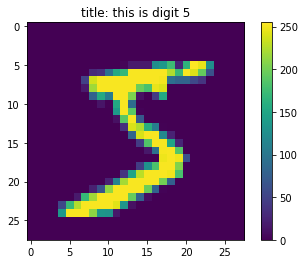

In [10]:
# plot one sample
plt.imshow(training_images[0])
plt.title('title: this is digit ' + str(training_labels[0]))
plt.colorbar()

In [11]:
# library
import numpy as np

In [12]:
# unique digits
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
# display shape
training_labels.shape

(60000,)

### One hot encode

We need to use *to_categorical* function to do one-hot encode. The operation of one-hot encode will check each unique level of the data and create a new binary vector for that level.

For example, the vector below has 3 levels: 1, 3, 4. Hence, for each level (for each of the value 1, 3, 4), there will be a new vector created that only takes values 1 or 0.

$$
\begin{bmatrix}
1 \\
3 \\
1 \\
4 \\
\end{bmatrix}
\rightarrow_\text{one hot}
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1\\
\end{bmatrix}
$$

Source is [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).

In [14]:
# one hot encode
training_labels_one_hot_encoded = tf.keras.utils.to_categorical(training_labels, num_classes=10)
test_labels_one_hot_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [15]:
# display shape
print(training_labels_one_hot_encoded.shape)
print(test_labels_one_hot_encoded.shape)

(60000, 10)
(10000, 10)


This means there are 10 classes.

## Install

Here we install a python installable github package from [this site](https://github.com/yiqiao-yin/DeepLearningSeries).

In [17]:
# from python notebook
!pip install git+https://github.com/yiqiao-yin/DeepLearningSeries.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/yiqiao-yin/DeepLearningSeries.git to /tmp/pip-req-build-sw_bd640
  Running command git clone -q https://github.com/yiqiao-yin/DeepLearningSeries.git /tmp/pip-req-build-sw_bd640
  Created wheel for DeepLearningSeries: filename=DeepLearningSeries-0.0.0-py3-none-any.whl size=3347 sha256=1c1ccacb458a677919ef290aab3bed8349dcd7f852e205ae77e14bd9b1d546fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-imwkt677/wheels/aa/1d/c5/d3b552b251276a8ebb974c22863c925470b39fdcee61503634
Successfully built DeepLearningSeries


In [18]:
# import 
from DeepLearning.modules import DL

In [19]:
# check out the function
DL.NN3

<function DeepLearning.modules.DL.NN3>

In [20]:
# save the output of the function into a new object called test_run
test_run = DL.NN3(x_train=training_images, y_train=training_labels_one_hot_encoded, 
                  x_test=test_images, y_test=test_labels_one_hot_encoded, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2072 - accuracy: 0.9360 - val_loss: 0.1122 - val_accuracy: 0.9672
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0926 - accuracy: 0.9719 - val_loss: 0.1019 - val_accuracy: 0.9709
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.1004 - val_accuracy: 0.9708
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0915 - val_accuracy: 0.9738
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0952 - val_accuracy: 0.9751
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.1135 - val_accuracy: 0.9723
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.1088 - val_accuracy:

In [21]:
test_run.keys()

dict_keys(['History', 'Model'])

In [22]:
test_run['Model']

In [25]:
test_run['History'].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])